# Made by _[Lorenzo Cavalcante](https://github.com/LorenzoC5)_ & _[Gabriel Navarro](https://github.com/GB-Navarro)_

# 📊 **1 - Estatística e Probabilidade Aplicadas a Finanças**

### **Exercícios** *(opcionais, mas altamente recomendados)*

##### *1) Identificando $\Omega$, $\mathcal{F}$ e $P$*


Você observará amanhã se o preço de uma ação **subiu**, **caiu** ou **ficou igual** ao preço de hoje.
1. Proponha um $\Omega$ adequado.
2. Dê um exemplo de $\mathcal{F}$ **válida** (liste alguns subconjuntos de $\Omega$) e explique por que é uma sigma-álgebra.
3. Defina um $P$ simples (probabilidades plausíveis que somem 1).

# Solução

### 1) Proponha um Ω adequado

$\Omega = {subiu, caiu, igual}$

### 2) Dê um exemplo de $\mathcal{F}$
$\mathcal{F}$ = {$\varnothing$, {subiu}, {caiu, igual}, $\Omega$}
- Contêm $\varnothing$;
- Contem $\Omega$, pois {subiu} $\cup$ {caiu, igual} = $\Omega$;
- Fechamento por complemento: O complemento de {subiu} em $\Omega$ é {caiu, igual}. O complemento de $\varnothing$ é $\Omega$. Ambos estão presentes em $\mathcal{F}$.
- Fechamento por uniões contáveis: Como $\mathcal{F}$ é finito, basta checar as uniões. Qualquer união de elementos de $\mathcal{F}$ precisa estar em um dos conjuntos listados. Por exemplo {subiu} $\cup$ {caiu, igual} = $\Omega$

### 3) Defina um $P$ simples
$P(subiu)$ = 0,4 

$P(caiu)$ = 0,3 

$P(igual)$ = 0,3

A soma das probabilidades é 1

##### *2) "Dado" e eventos*

Considere um dado justo: $\Omega=\{1,2,3,4,5,6\}$.
1. Defina $A=\{2,4,6\}$ (pares) e $B=\{1,3,5\}$ (ímpares). Calcule $P(A)$, $P(B)$, $P(A\cup B)$, $P(A\cap B)$.
2. Se $C=\{1,2,3\}$, calcule $P(C^c)$ e verifique $P(C)+P(C^c)=1$.


In [57]:
# Solução Exercício 2: Dado justo

#A = {2,4,6} (pares), B = {1,3,5} (ímpares), C = {1,2,3}
A = {2,4,6} #isso não é uma lista, é um conjunto(set), pois foi declarado usando chaves {}
B = {1,3,5}
C = {1,2,3}

Omega = set(range(1,7)) #conjunto dos resultados possíveis de um dado justo de 6 faces
P = lambda event: len(event)/6 #função lambda que calcula a probabilidade de um evento, tratando todos os resultados como igualmente prováveis

print('P(A)=', P(A)) #3/6
print('P(B)=', P(B)) #3/6
print('P(A∪B)=', P(A.union(B))) #6/6
print('P(A∩B)=', P(A.intersection(B))) #0/6
print('P(C^c)=', P(Omega - C)) #probabilidade do complemento de C, ou seja dos resultados que não estão em C
print('P(C)+P(C^c)=', P(C)+P(Omega-C)) #deve necessariamente ser 1, pois C e C^c são complementares

P(A)= 0.5
P(B)= 0.5
P(A∪B)= 1.0
P(A∩B)= 0.0
P(C^c)= 0.5
P(C)+P(C^c)= 1.0


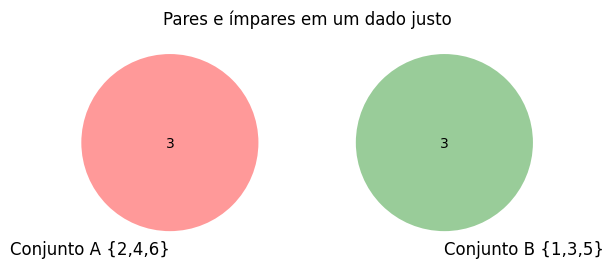

In [58]:
from matplotlib_venn import venn2

A = {2,4,6} #isso não é uma lista, é um conjunto(set), pois foi declarado usando chaves {}
B = {1,3,5}
Omega = set(range(1,7))
C = {1,2,3}

#como A e B são disjuntos, a interseção é vazia
venn2(subsets = ([A, B]), set_labels = ('Conjunto A {2,4,6}', 'Conjunto B {1,3,5}'))
plt.title("Pares e ímpares em um dado justo")
plt.show()

##### *3) É sigma-álgebra?*

Em $\Omega=\{a,b,c\}$, avalie se cada coleção é uma sigma-álgebra. Justifique.
1. $\mathcal{G}_1=\{\varnothing,\Omega\}$.
2. $\mathcal{G}_2=\{\varnothing,\{a\},\{b,c\},\Omega\}$.
3. $\mathcal{G}_3=\{\varnothing,\{a,b\},\Omega\}$.


In [5]:
# Solução Exercício 3: É sigma-álgebra?

Omega = {'a','b','c'}

G1 = [frozenset(), frozenset(Omega)]
G2 = [frozenset(), frozenset({'a'}), frozenset({'b','c'}), frozenset(Omega)]
G3 = [frozenset(), frozenset({'a','b'}), frozenset(Omega)]

#função para verificar se um conjunto de subconjuntos é uma sigma-álgebra
def is_sigma_algebra(G, Omega): #G é o conjunto de subconjuntos, Omega é o espaço amostral
    G = [set(g) for g in G] #converte frozensets para sets para facilitar operações

    # 1) vazio em G
    if set() not in G: return False #verifica se o conjunto vazio está em G

    # 2) fechamento por complemento
    for A in G: #para cada conjunto A em G
        if (set(Omega)-A) not in G: #verifica se o complemento de A está em G, A^c = Ω - A
            return False
        
    # 3) fechamento por uniões contáveis -> para finito, ver uniões finitas
    for A in G:
        for B in G:
            if (A.union(B)) not in G:
                return False
    return True

print('G1 é sigma-álgebra?', is_sigma_algebra(G1, Omega)) #deve ser True, pois G1 = {∅, Ω}, é o menor sigma-álgebra possível
print('G2 é sigma-álgebra?', is_sigma_algebra(G2, Omega)) #deve ser True, pois G2 = {∅, {a}, {b,c}, Ω}, é uma sigma-álgebra válida, já que {a} e {b,c} são complementares e fechadas por união
print('G3 é sigma-álgebra?', is_sigma_algebra(G3, Omega)) #deve ser False, pois G3 = {∅, {a,b}, Ω}, não é fechada por complemento, pois o complemento de {a,b} é {c}, que não está em G3

G1 é sigma-álgebra? True
G2 é sigma-álgebra? True
G3 é sigma-álgebra? False


##### 4) *Frequências $\to$ Probabilidades*

Em 10 dias, o fechamento de um ativo resultou em: $\{\text{subiu}, \text{subiu}, \text{caiu}, \text{igual}, \text{subiu}, \text{caiu}, \text{caiu}, \text{subiu}, \text{igual}, \text{subiu}\}$.
1. Proponha $\Omega$ e uma $\mathcal{F}$ mínima natural.
2. Defina $P$ pelas **frequências relativas** e calcule $P(\text{subiu})$, $P(\text{caiu})$, $P(\text{igual})$.
3. Verifique $P(\Omega)=1$ e a aditividade para eventos disjuntos simples.


In [60]:
# Lista de resultados observados em 10 dias
dados = ["subiu","subiu","caiu","igual","subiu","caiu","caiu","subiu","igual","subiu"]
Omega = set(dados)

contagem = lambda resultado_observado: dados.count(resultado_observado)

print("Resultados observados nos 10 dias:", dados)
print(f"Ω (espaço amostral) = {Omega}")

print(f"O preço subiu em {contagem('subiu')} dias.")
print(f"O preço caiu em {contagem('caiu')} dias.")
print(f"O preço ficou igual em {contagem('igual')} dias.")

# 2 - Probabilidades pelas frequências relativas
total = len(dados) #total de observações
P = lambda evento: contagem(evento) / total #função que calcula a probabilidade de um evento baseado na frequência relativa

print("\n2 - Probabilidades estimadas pelas frequências relativas:")
print(f"O preço subiu em {contagem('subiu')} dias.  -> P(subiu) = {P('subiu')}") #5/10
print(f"O preço caiu em {contagem('caiu')} dias.   -> P(caiu)  = {P('caiu')}") #3/10
print(f"O preço ficou igual em {contagem('igual')} dias. -> P(igual) = {P('igual')}") #2/10

# 3) Verificar que P(Ω) = 1
P_omega = P("subiu") + P("caiu") + P("igual")
print("\n3 - Verificação de que P(Ω) = 1:")
print(f"P(Ω) = {P_omega}")

Resultados observados nos 10 dias: ['subiu', 'subiu', 'caiu', 'igual', 'subiu', 'caiu', 'caiu', 'subiu', 'igual', 'subiu']
Ω (espaço amostral) = {'subiu', 'igual', 'caiu'}
O preço subiu em 5 dias.
O preço caiu em 3 dias.
O preço ficou igual em 2 dias.

2 - Probabilidades estimadas pelas frequências relativas:
O preço subiu em 5 dias.  -> P(subiu) = 0.5
O preço caiu em 3 dias.   -> P(caiu)  = 0.3
O preço ficou igual em 2 dias. -> P(igual) = 0.2

3 - Verificação de que P(Ω) = 1:
P(Ω) = 1.0


##### 5) *Refinando $\mathcal{F}$*


No dado justo, compare:
- $\mathcal{F}_\text{mín}=\{\varnothing,\Omega\}$
- $\mathcal{F}_\text{par/ímpar}=\{\varnothing,\{2,4,6\},\{1,3,5\},\Omega\}$
- $\mathcal{F}_\text{toda}=2^\Omega$

Dê exemplos de perguntas/eventos que **não** são mensuráveis em $\mathcal{F}_\text{mín}$, mas passam a ser em $\mathcal{F}_\text{par/ímpar}$ e, depois, em $2^\Omega$. Explique como aumentar $\mathcal{F}$ amplia o escopo de perguntas respondíveis pelo modelo.

# Solução
Temos um dado justo com: $\Omega$={1,2,3,4,5,6}

### Caso 1 - $\mathcal{F}_\text{mín}=\{\varnothing,\Omega\}$

Só temos dois eventos mensuráveis: 
- Evento impossível (P=0)
- Qualquer evento possível do dado {1,2,3,4,5,6}, porém não sabemos qual evento em específico.

E.G: 

Caiu zero? posso afirmar, pois é um evento impossível (P=0). ✅

Caiu um número entre 1 e 6? Posso afirmar, pois é $\Omega$={1,2,3,4,5,6} e P ($\Omega$)=1 ✅

O número que saiu foi par? Não posso mensurar, pois precisaria do subconjunto {2, 4, 6} ❌

Caiu 4? Não sei dizer, pois para mensurar precisaria do subcounjunto {4} ❌


### Caso 2 - $\mathcal{F}_\text{par/ímpar}=\{\varnothing,\{2,4,6\},\{1,3,5\},\Omega\}$

Agora somos capazes de distinguir entre: Eventos impossíveis, eventos possíveis, chance de vir par e chance de ímpar.

E.G: 

Caiu zero? posso afirmar, pois é um evento impossível (P=0). ✅

Caiu um número entre 1 e 6? Posso afirmar, pois é $\Omega$={1,2,3,4,5,6} e P ($\Omega$)=1 ✅

O número que saiu foi par? Posso mensurar, pois agora tenho o subconjunto {2, 4, 6} ✅

Caiu 4? Não sei dizer, pois para mensurar precisaria do subcounjunto {4} ❌



### Caso 3 - $\mathcal{F}_\text{toda}=2^\Omega$

Agora temos todos os subconjuntos de $\Omega$ e podemos mensurar tanto probabilidade individual quanto conjunta.

E.G: 

Caiu zero? posso afirmar, pois é um evento impossível (P=0). ✅

Caiu um número entre 1 e 6? Posso afirmar, pois é $\Omega$={1,2,3,4,5,6} e P ($\Omega$)=1 ✅

O número que saiu foi par? Posso mensurar, pois agora tenho o subconjunto {2, 4, 6} ✅

Caiu 4? Não sei dizer, sim posso mensurar a probabilidade do subcounjunto {4} ✅





### **Outros Exercícios**

##### *6) Independência de eventos*

Considere um dado justo (faces $1$–$6$) e dois lançamentos independentes.

1. No **primeiro** lançamento, defina $A=\{\text{par}\}$ e $B=\{\text{resultado}>4\}$. Calcule $P(A)$, $P(B)$ e $P(A\cap B)$. Verifique se $A$ e $B$ são independentes checando $P(A\cap B)=P(A)P(B)$.
2. Agora, em **dois** lançamentos, defina $C=\{\text{a soma é }7\}$ e $D=\{\text{o primeiro resultado é par}\}$. Calcule $P(C)$, $P(D)$ e $P(C\cap D)$ e teste a independência de $C$ e $D$.
3. Explique, em 2–3 linhas, por que “lançamentos independentes” **não** implica que quaisquer eventos construídos sobre eles sejam independentes (use o par $C$, $D$ como exemplo).

In [86]:
# Solução Exercício 6: Independência de eventos
# - No primeiro lançamento: A = {par}, B = {maior que 3} (ou seja {4,5,6}).
# - Em dois lançamentos: C = {soma = 7}, D = {segundo lançamento é par}.

Omega = range(1,7)

# 1) Primeiro lançamento
A = {2,4,6} #par
B = {5,6} #maior que 3
P = lambda evento: len(evento)/6

print('Primeiro lançamento:')
print('P(A)=', P(A))
print('P(B)=', P(B))
print('P(A∩B)=', P(A.intersection(B)))
print('P(A)P(B)=', P(A) * P(B))

print('Conclusão: A e B são independentes?' , (P(A.intersection(B)) == P(A)*P(B))) #verifica se a igualdade de independência é satisfeita

# 2) Dois lançamentos
pairs = [(i,j) for i in Omega for j in Omega] #todos os pares possíveis de resultados em dois lançamentos

#usaremos list comprehension para definir os eventos C e D, filtrando os pares que satisfazem as condições
C = [p for p in pairs if p[0]+p[1]==7] #valor do dado 1 + valor do dado 2 precisa ser igual a 7
D = [p for p in pairs if p[1]%2==0]  # segundo lançamento par   
P_pair = lambda S: len(S)/36

print('\nDois lançamentos:')
print('P(C)=', P_pair(C)) #probabilidade da soma ser 7
print('P(D)=', P_pair(D)) #probabilidade do segundo lançamento ser par

print('P(C∩D)=', P_pair([p for p in C if p in D])) #interseção de C e D: pares que satisfazem ambas as condições, ou seja, estão em ambas as listas
print('P(C)P(D)=', P_pair(C) * P_pair(D)) #produto das probabilidades individuais
print('Conclusão: C e D são independentes?', (P_pair([p for p in C if p in D]) - P_pair(C)*P_pair(D)) == 0)

# 3) Explicação
print('\nExplicação: lançamentos independentes significam que o resultado de um lançamento não afeta a distribuição do outro.\nEventos que se referem a diferentes componentes (ex.: soma = 7 e segundo lançamento par) podem ser independentes mesmo que cada evento individual envolva ambos os lançamentos ou apenas um deles.')

Primeiro lançamento:
P(A)= 0.5
P(B)= 0.3333333333333333
P(A∩B)= 0.16666666666666666
P(A)P(B)= 0.16666666666666666
Conclusão: A e B são independentes? True

Dois lançamentos:
P(C)= 0.16666666666666666
P(D)= 0.5
P(C∩D)= 0.08333333333333333
P(C)P(D)= 0.08333333333333333
Conclusão: C e D são independentes? True

Explicação: lançamentos independentes significam que o resultado de um lançamento não afeta a distribuição do outro.
Eventos que se referem a diferentes componentes (ex.: soma = 7 e segundo lançamento par) podem ser independentes mesmo que cada evento individual envolva ambos os lançamentos ou apenas um deles.


##### *7) Teorema de Bayes (diagnóstico)*

Um teste para uma condição rara tem **sensibilidade** $0{,}95$ e **especificidade** $0{,}98$. A prevalência na população é $0{,}5\%$.

1. Calcule $P(\text{positivo})$ pela lei total:  
   $$P(+) = P(+\mid \text{doente})P(\text{doente}) + P(+\mid \text{saudável})P(\text{saudável}).$$
2. Use Bayes para encontrar a **probabilidade pós-teste**:  
   $$P(\text{doente}\mid +) = \frac{P(+\mid \text{doente})P(\text{doente})}{P(+)}.$$
3. Se um **segundo teste independente** com sensibilidade $0{,}90$ e especificidade $0{,}99$ também der **positivo**, atualize a probabilidade de estar doente (assuma independência condicional dados os estados).

In [107]:
# Solução Exercício 7: Teorema de Bayes (diagnóstico)

sens = 0.95   # P(+ | doente) -> Sensibilidade Significa: se a pessoa está doente, o teste dá positivo 95% das vezes.
spec = 0.98   # P(- | saudável) -> Especificidade Significa: se a pessoa está saudável, o teste dá negativo 98% das vezes.
prev = 0.005  # prevalência = 0.5% -> Número de pessoas doentes na população

P_pos = sens*prev + (1-spec)*(1-prev) #Positivo verdadeiro + Falso positivo, ou seja, a probabilidade total de um teste dar positivo
PPV = sens*prev / P_pos #probabilidade de estar doente dado teste positivo

print('P(+)=', P_pos)
print('P(doente | +) = PPV =', PPV)

# 3) Segundo teste independente com sensibilidade 0.90 e mesma especificidade 0.98
sens2 = 0.90
spec2 = 0.99

# Probabilidade de estar doente dado dois testes positivos (assumindo independência condicional)
num = sens * sens2 * prev #numerador: probabilidade de dois positivos verdadeiros entre os doentes (95% * 90% * prevalência)
den = num + (1-spec)*(1-spec2)*(1-prev) #denominador: numerador + probabilidade de dois falsos positivos entre os saudáveis ((1-98%)*(1-99%)*(1-prevalência))
post_two = num/den #probabilidade posterior de estar doente dado dois testes positivos
print('P(doente | dois +) =', post_two)

print("\nDepois de 1 teste positivo, a chance de estar doente é de aproximadamente 19%; " \
"\ndepois de 2 testes positivos independentes, sobe para cerca de 95,55% — " \
"\nou seja, a certeza aumenta drasticamente porque a probabilidade de dois falsos positivos seguidos é muito pequena.")

P(+)= 0.02465000000000002
P(doente | +) = PPV = 0.19269776876267733
P(doente | dois +) = 0.9555207867679928

Depois de 1 teste positivo, a chance de estar doente é de aproximadamente 19%; 
depois de 2 testes positivos independentes, sobe para cerca de 95,55% — 
ou seja, a certeza aumenta drasticamente porque a probabilidade de dois falsos positivos seguidos é muito pequena.


##### *8) Covariância e correlação*

Seja $(X,Y)$ com a seguinte distribuição conjunta (todos os demais pares têm probabilidade $0$):

<div align="center">

| $x$ \ $y$ |   $0$   |   $1$   |
|:---------:|:-------:|:-------:|
|    $1$    | $0{,}20$| $0{,}30$|
|    $2$    | $0{,}10$| $0{,}40$|

</div>

1. Calcule as marginais $P_X$ e $P_Y$ e, em seguida, $E[X]$, $E[Y]$.
2. Encontre $E[XY]$ e a **covariância** $\operatorname{Cov}(X,Y)=E[XY]-E[X]E[Y]$.
3. Calcule a **correlação** $\rho_{X,Y}=\dfrac{\operatorname{Cov}(X,Y)}{\sqrt{\operatorname{Var}(X)\operatorname{Var}(Y)}}$.
4. Interprete o **sinal** e a **magnitude** de $\rho_{X,Y}$ em 1–2 linhas.

In [ ]:
# Solução Exercício 8: Covariância e correlação
import numpy as np

# X pode valer 1 ou 2; Y pode valer 0 ou 1
# Distribuição conjunta dada
# P(X=1,Y=0)=0.20, P(1,1)=0.30, P(2,0)=0.10, P(2,1)=0.40
pxy = { 
        (1,0):0.20, 
        (1,1):0.30, 
        (2,0):0.10, 
        (2,1):0.40 
    } # dicionário com tuplas (x,y) como chaves e probabilidades conjuntas como valores

# Marginais
#É como perguntar: “Qual a probabilidade de X=1, independentemente do valor de Y?”, ou seja, estamos analisando uma variável de cada vez
from collections import defaultdict
px = defaultdict(float)
py = defaultdict(float)
for (x,y),p in pxy.items(): #para cada tupla (x,y) e sua probabilidade p na distribuição conjunta
    px[x]+=p #soma as probabilidades para um dado valor de x (1 ou 2)
    py[y]+=p #soma as probabilidades para um dado valor de y (0 ou 1)

E_X = sum(x*p for x,p in px.items()) #em x, p são os pares chave-valor do dicionário px, ou seja, valores de X e suas respectivas probabilidades
E_Y = sum(y*p for y,p in py.items()) #em y, p são os pares chave-valor do dicionário py, ou seja, valores de Y e suas respectivas probabilidades
E_XY = sum(x*y*p for (x,y),p in pxy.items()) #esperança do produto XY, ou seja, probabilidade conjunta ponderada pelo produto dos valores (esperança conjunta)

Var_X = sum((x-E_X)**2 * p for x,p in px.items()) #valor esperado do quadrado da diferença entre X e sua média, ponderado pela probabilidade de cada valor de X
Var_Y = sum((y-E_Y)**2 * p for y,p in py.items()) #valor esperado do quadrado da diferença entre Y e sua média, ponderado pela probabilidade de cada valor de Y

cov = E_XY - E_X * E_Y #covariância entre X e Y
corr = cov / ((Var_X * Var_Y)**0.5) #correlação de Pearson entre X e Y: COV(X,Y) / ((Var_X * Var_Y) ^ 1/2)

print('P_X =', dict(px))
print('P_Y =', dict(py))
print('E[X] =', E_X)
print('E[Y] =', E_Y)
print('E[XY] =', E_XY)
print('Cov(X,Y) =', cov)
print('Var(X) =', Var_X)
print('Var(Y) =', Var_Y)
print('Corr(X,Y) =', corr)

P_X = {1: 0.5, 2: 0.5}
P_Y = {0: 0.30000000000000004, 1: 0.7}
E[X] = 1.5
E[Y] = 0.7
E[XY] = 1.1
Cov(X,Y) = 0.050000000000000266
Var(X) = 0.25
Var(Y) = 0.21000000000000002
Corr(X,Y) = 0.21821789023599353


##### *9) Variáveis aleatórias: PMF, CDF e transformações*

Considere um dado justo. Defina $X=Z$ (o valor observado) e $Y=\mathbf{1}\{\text{par}\}$.

1. Escreva a **PMF** de $X$ e $Y$ e as **CDFs** $F_X$, $F_Y$.
2. Calcule $E[X]$, $\operatorname{Var}(X)$, $E[Y]$ e $\operatorname{Var}(Y)$.
3. Para $W=2X-3$, encontre $E[W]$ e $\operatorname{Var}(W)$ usando **linearidade** e a regra para variâncias sob transformação linear.
4. Seja $S=X+Y$. Liste a **PMF** de $S$ (valores possíveis e probabilidades) e calcule $E[S]$.

In [7]:
# Solução Exercício 9: Variáveis aleatórias com um dado justo
import collections
Omega = [1,2,3,4,5,6]
# X = valor observado
# Y = 1{par}

pX = {k:1/6 for k in Omega}
pY = {0: sum(1 for k in Omega if k%2==1)/6, 1: sum(1 for k in Omega if k%2==0)/6}

# PMFs
print('PMF de X (pX):', pX)
print('PMF de Y (pY):', pY)

# CDFs (representadas como funções que retornam F(t) = P(X <= t))
def cdf_X(t):
    return sum(v for k,v in pX.items() if k <= t)
def cdf_Y(t):
    return sum(v for k,v in pY.items() if k <= t)

print('Ex.: F_X(3)=', cdf_X(3), ' F_Y(0)=', cdf_Y(0))

# Expectation and variance
E_X = sum(k*v for k,v in pX.items())
Var_X = sum((k-E_X)**2 * v for k,v in pX.items())
E_Y = sum(k*v for k,v in pY.items())
Var_Y = sum((k-E_Y)**2 * v for k,v in pY.items())

print('E[X]=', E_X, 'Var(X)=', Var_X)
print('E[Y]=', E_Y, 'Var(Y)=', Var_Y)

# W = 2X - 3
E_W = 2*E_X - 3
Var_W = (2**2) * Var_X
print('W = 2X-3 -> E[W]=', E_W, 'Var(W)=', Var_W)

# S = X + Y -> enumerar PMF de S
from collections import defaultdict
pS = defaultdict(float)
for x in Omega:
    y = 1 if x%2==0 else 0
    pS[x+y] += 1/6

print('PMF de S (valor:prob):', dict(pS))
E_S = sum(s*p for s,p in pS.items())
print('E[S]=', E_S)

PMF de X (pX): {1: 0.16666666666666666, 2: 0.16666666666666666, 3: 0.16666666666666666, 4: 0.16666666666666666, 5: 0.16666666666666666, 6: 0.16666666666666666}
PMF de Y (pY): {0: 0.5, 1: 0.5}
Ex.: F_X(3)= 0.5  F_Y(0)= 0.5
E[X]= 3.5 Var(X)= 2.9166666666666665
E[Y]= 0.5 Var(Y)= 0.25
W = 2X-3 -> E[W]= 4.0 Var(W)= 11.666666666666666
PMF de S (valor:prob): {1: 0.16666666666666666, 3: 0.3333333333333333, 5: 0.3333333333333333, 7: 0.16666666666666666}
E[S]= 3.9999999999999996
